In [1]:
import rospy
from geometry_msgs.msg import Pose, Point
from follow_goal.srv import GoalNumber
from follow_goal.msg import PlanningAction
from std_srvs.srv import *
from nav_msgs.msg import Odometry
import follow_goal.msg
import actionlib
import actionlib.msg
%matplotlib widget
import matplotlib.pyplot as plt
import rospy
import tf
from nav_msgs.msg import Odometry
from tf.transformations import quaternion_matrix
import numpy as np
from matplotlib.animation import FuncAnimation
import ipywidgets as widgets
from IPython.display import display
from sensor_msgs.msg import LaserScan
import jupyros as jr
import time
import rospy
import math

In [2]:
global user, status

rospy.init_node('user_interface')
user=actionlib.SimpleActionClient('/reaching_goal', follow_goal.msg.PlanningAction)
user.wait_for_server()
status=user.get_state()

In [3]:

posx_widget =widgets.FloatText( description='Pos x:', disabled=False)
posy_widget =widgets.FloatText( description='Pos y:', disabled=False)

confirm_goal=widgets.Button(description="Confirm goal")
output_confirm=widgets.Output()

cancell_goal=widgets.Button(description="Cancel a goal")
output_cancell = widgets.Output()

menu=widgets.VBox([posx_widget, posy_widget, confirm_goal, cancell_goal])


In [4]:
global user, status

def on_confirm_clicked(confirm_goal):
    global posx, posy
    posx=float(posx_widget.value)
    posy=float(posy_widget.value)
    with output_confirm:
        send_goal()
confirm_goal.on_click(on_confirm_clicked)

def send_goal():
    goal = follow_goal.msg.PlanningGoal()
    status=user.get_state()
    if not (status==actionlib.GoalStatus.ACTIVE):
        goal.target_pose.pose.position.x = posx
        goal.target_pose.pose.position.y = posy
        user.send_goal(goal)
        print("Goal sent!")
    else:
        print("Goal has been already set")

def on_cancell_clicked(cancell_goal):
    with output_cancell:
        user.cancel_goal()
        status=user.get_state()
    print("Goal cancelled")
cancell_goal.on_click(on_cancell_clicked)


print("Click on one of the following options:")
display(menu, output_confirm, output_cancell)

Click on one of the following options:


Output()

Output()

In [5]:
global posx, posy, user, status

class Visualiser:
    def __init__(self):
        self.fig, (self.ax, self.ax2) = plt.subplots(1,2, figsize=(10,4))
        self.ln, = self.ax.plot([], [], 'ro', markersize='2', label='Trajectory')
        self.posx=posx
        self.posy=posy
        self.x_data, self.y_data = [] , []
        self.reached = 0
        self.deleted = 0
    def plot_init(self):
        self.ax.set_xlim(-30, 30)
        self.ax.set_ylim(-30, 30)
        self.ax2.set_ylim(0, 10)
        return self.ln
    def odom_callback(self, msg):
        self.y_data.append(msg.pose.pose.position.y)
        self.x_data.append(msg.pose.pose.position.x)
    def update_plot(self, frame):
        self.ln.set_data(self.x_data, self.y_data)
        self.posx=posx
        self.posy=posy
        status=user.get_state()
        #check if status is reached
        if status==3:
            self.ax.plot(self.posx, self.posy, marker='*', color='green', markersize='10', label='Target')
            self.reached+=1
        #check if status is deleted
        elif status==2:
            self.ax.plot(self.posx, self.posy, marker='*', color='blue', markersize='10', label='Target')
            self.deleted+=1
        else:
            self.ax.plot(self.posx, self.posy, marker='*', color='orange', markersize='10', label='Target')
        
        print(self.reached)
        print(self.deleted)
        self.ax2.bar(['reached', 'deleted'], [self.reached, self.deleted], color = 'b')
        return self.ln

In [6]:
min_dist_widget =widgets.FloatText( description='Dist to obstacle:', disabled=True)
output_dist=widgets.Output()

/tmp/ipykernel_15656/862728850.py:16: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = FuncAnimation(vis.fig, vis.update_plot, init_func=vis.plot_init)


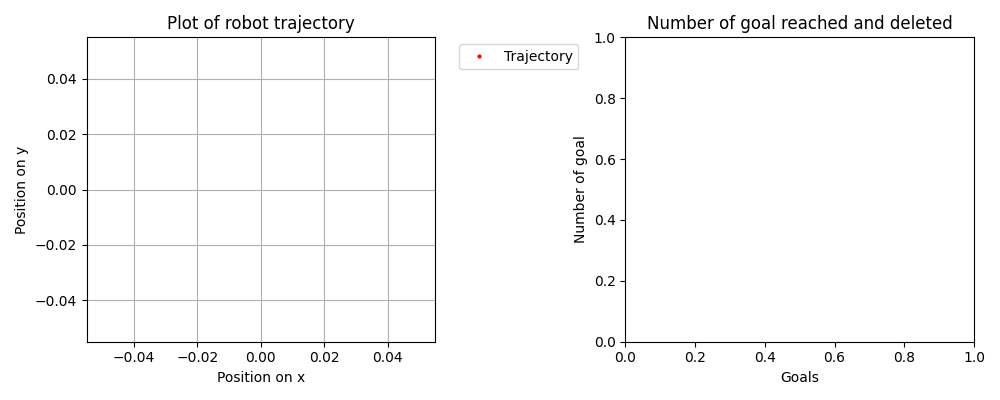

FloatText(value=0.0, description='Dist to obstacle:', disabled=True)

Output()

In [7]:

vis = Visualiser()
vis.ax.set_title('Plot of robot trajectory')
vis.ax.set_xlabel('Position on x')
vis.ax.set_ylabel('Position on y')
vis.ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
vis.ax.grid()

vis.ax2.set_title('Number of goal reached and deleted')
vis.ax2.set_xlabel('Goals')
vis.ax2.set_ylabel('Number of goal')

#vis.ax2.bar(goal_string, num_goal)

sub = rospy.Subscriber('/odom', Odometry, vis.odom_callback)
ani = FuncAnimation(vis.fig, vis.update_plot, init_func=vis.plot_init)

plt.show(block=True)

display(min_dist_widget, output_dist)


In [8]:

global min_range

def scan_callback(scan):
    min_range = scan.range_max
    for range_val in scan.ranges:
        if range_val < min_range:
            min_range = range_val
    min_dist_widget.value=round(min_range, 3)
    time.sleep(0.5)

jr.subscribe('/scan', LaserScan, scan_callback)


In [ ]:
#global deleted, reached
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget

fig2 = plt.figure(figsize=(6, 4))

fig2, ax2 = plt.subplots()

goal_string = ["reached", "deleted"]
#num_goal = [reached, deleted]
#num_goal = [3, 5]
np.random.seed(1)
num_goal = 4 + np.random.normal(0, 1.5, 200)

x_pos = np.arange(len(goal_string))

#ax2.set_title('Number of goal reached and deleted')
#ax2.set_xlabel('Goals')
#ax2.set_ylabel('Number of goal')

#plt.plot(3, 3, marker='*', color='orange', markersize='10', label='Target')
ax2.hist(num_goal, bins=2, linewidth=0.5, edgecolor="white")

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget

plt.style.use('_mpl-gallery')

# make data
np.random.seed(1)
x = 4 + np.random.normal(0, 1.5, 200)

# plot:
fig, ax = plt.subplots()

ax.hist(x, bins=8, linewidth=0.5, edgecolor="white")

#ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
 #      ylim=(0, 56), yticks=np.linspace(0, 56, 9))

plt.show()

In [ ]:

vis2 = Visualiser()
goal_string = ["reached", "deleted"]
#num_goal = [reached, deleted]
#num_goal = [3, 5]
np.random.seed(1)
num_goal = 4 + np.random.normal(0, 1.5, 200)

x_pos = np.arange(len(goal_string))

vis.ax2.set_title('Number of goal reached and deleted')
vis.ax2.set_xlabel('Goals')
vis.ax2.set_ylabel('Number of goal')

#plt.plot(3, 3, marker='*', color='orange', markersize='10', label='Target')
vis.ax2.hist(num_goal, bins=2, linewidth=0.5, edgecolor="white")

plt.show()